In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("C:/Users/Manav Singh/Downloads/QVI_data.csv")

In [4]:
 df.sort_values(by='DATE').head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
101808,104039,2018-07-01,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium
118872,118107,2018-07-01,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream
221754,226024,2018-07-01,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
147394,152040,2018-07-01,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream
29702,33140,2018-07-01,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream


In [5]:
 df.sort_values(by='DATE' , ascending=False).head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
126988,125333,2019-06-30,125,129627,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110,INFUZIONS,OLDER SINGLES/COUPLES,Premium
209407,214115,2019-06-30,214,213715,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,THINS,RETIREES,Mainstream
220621,225087,2019-06-30,225,225187,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Budget
209452,214164,2019-06-30,214,213762,71,Twisties Cheese Burger 250g,1,4.3,250,TWISTIES,RETIREES,Budget
245355,248178,2019-06-30,248,250424,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,150,SMITHS,OLDER FAMILIES,Budget


In [6]:
df['DATE']=pd.to_datetime(df['DATE'])

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [8]:
df['YM']=[s.year*100+s.month for s in df['DATE']]

In [9]:
df2 =df.groupby(['STORE_NBR','YM']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique','TXN_ID':'nunique','PROD_QTY':'sum'})


In [19]:
dfprior = df2[(df2.index.get_level_values('YM') < 201902) | (df2.index.get_level_values('YM') > 201904)]
dftrial = df2[(df2.index.get_level_values('YM') >= 201902) & (df2.index.get_level_values('YM') <= 201904)]

In [20]:
 dfprior.sort_values(by='YM' , ascending=False).head()

,,TOT_SALES,LYLTY_CARD_NBR,TXN_ID,PROD_QTY,TXN_PER_CUST
STORE_NBR,YM,,,,,
272,201906,312.1,34,37,70,1.088235
83,201906,942.2,99,128,258,1.292929
30,201906,800.0,94,116,234,1.234043
187,201906,255.3,36,38,57,1.055556
84,201906,474.4,46,52,104,1.130435


In [12]:
# def Correlation(store):
   
#     a=[]
#     y=df2[['TOT_SALES','LYLTY_CARD_NBR']]
#     for i in y.index:
#         a.append(y.loc[store].corrwith(y.loc[i[0]])) # y loc[i[0] gets store number associated with that index
#     df3= pd.DataFrame(a)
#     df3.index=y.index
#     df3=df.drop_duplicates() #incase there are duplicate rows in y
#     df3.index=[s[0] for s in df.index]
#     df3.index.name="STORE_NBR"
#     return df3
def Correlation(store):
    a = []
    y = dfprior[['TOT_SALES', 'LYLTY_CARD_NBR']]
    for i in y.index:
        a.append(y.loc[store].corrwith(y.loc[i[0]]))
    df3 = pd.DataFrame(a)
    df3.index = y.index
    df3 = df3.drop_duplicates()
    df3.index = [s[0] for s in df3.index]
    df3.index.name = "STORE_NBR"
    df3=df3.abs()
    df3['MEAN']=df3.mean(axis=1)
    return df3

In [13]:
t = Correlation(77)
t.head()

,TOT_SALES,LYLTY_CARD_NBR,MEAN
STORE_NBR,,,
1,0.138045,0.292531,0.215288
2,0.092418,0.226371,0.159395
3,0.383045,0.722707,0.552876
4,0.529948,0.526731,0.528340
5,0.253424,0.172905,0.213164


In [14]:
t.isna().any().any()

True

In [15]:
t2=t.sort_values(['MEAN'],ascending=False).dropna()
t2.head()

,TOT_SALES,LYLTY_CARD_NBR,MEAN
STORE_NBR,,,
77,1.000000,1.000000,1.000000
233,0.880004,0.994132,0.937068
84,0.777507,0.876067,0.826787
41,0.836940,0.799126,0.818033
115,0.715956,0.839229,0.777592


Hence Control Store for 77 is 233

<AxesSubplot:ylabel='STORE_NBR'>

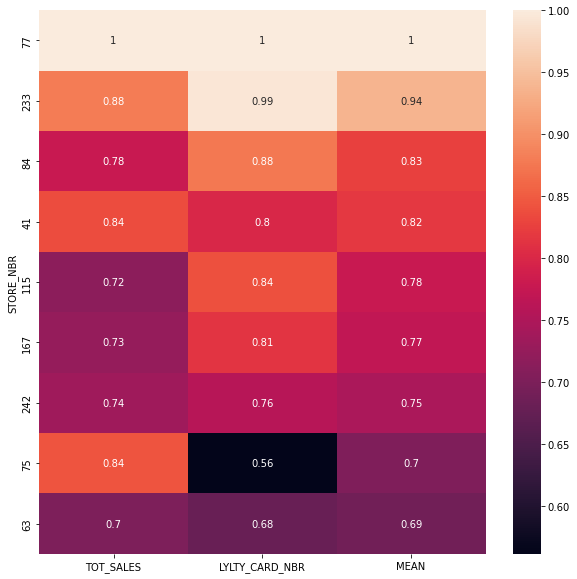

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(t2[t2.TOT_SALES.abs()>0.7],annot = True)

In [18]:
df2['TXN_PER_CUST']=df2['TXN_ID']/df2['LYLTY_CARD_NBR']

Metrics of comparison:
1. total sales revenue
2. total number of customers
3. average number of transactions per customer

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


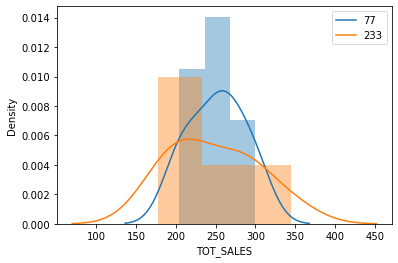

In [88]:
sns.distplot(dfprior.loc[77]['TOT_SALES'])
sns.distplot(dfprior.loc[233]['TOT_SALES'])
plt.legend(labels=['77','233'])


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


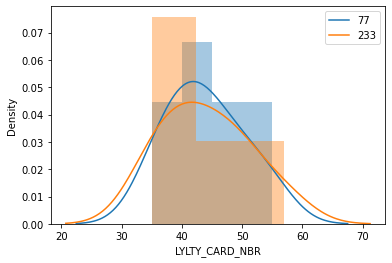

In [93]:
sns.distplot(dfprior.loc[77]['LYLTY_CARD_NBR'])
sns.distplot(dfprior.loc[233]['LYLTY_CARD_NBR'])
plt.legend(labels=['77','233'])


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


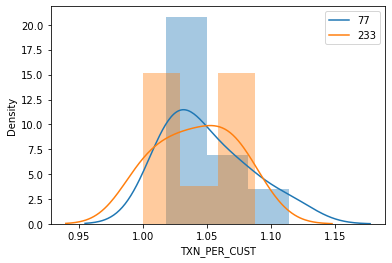

In [95]:
sns.distplot(dfprior.loc[77]['TXN_PER_CUST'])
sns.distplot(dfprior.loc[233]['TXN_PER_CUST'])
plt.legend(labels=['77','233'])

Now we observe the behavior during the trial period of these two stores:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


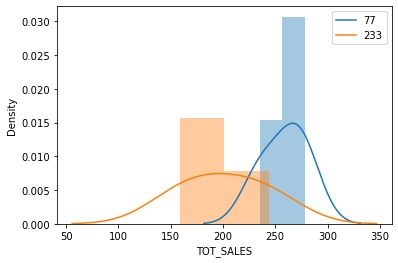

In [98]:
sns.distplot(dftrial.loc[77]['TOT_SALES'])
sns.distplot(dftrial.loc[233]['TOT_SALES'])
plt.legend(labels=['77','233'])

CLearly store 77 showed significantly higher sales than control store

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


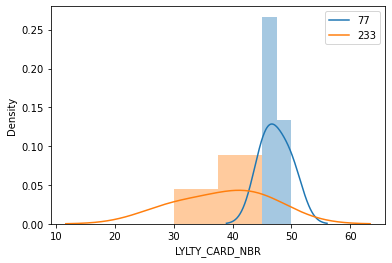

In [102]:
sns.distplot(dftrial.loc[77]['LYLTY_CARD_NBR'])
sns.distplot(dftrial.loc[233]['LYLTY_CARD_NBR'])
plt.legend(labels=['77','233'])


Trial store also shows better customer numbers

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


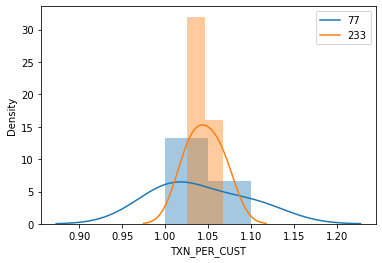

In [103]:
sns.distplot(dftrial.loc[77]['TXN_PER_CUST'])
sns.distplot(dftrial.loc[233]['TXN_PER_CUST'])
plt.legend(labels=['77','233'])

Transaction per customers are not significantly higher 

This process will be now repeated for the other two trial stores:

In [21]:
t3 = Correlation(86)
t3.head()

,TOT_SALES,LYLTY_CARD_NBR,MEAN
STORE_NBR,,,
1,0.483857,0.486520,0.485188
2,0.237462,0.188549,0.213006
3,0.232796,0.273946,0.253371
4,0.048187,0.294060,0.171123
5,0.001803,0.387089,0.194446


In [22]:
t4=t3.sort_values(['MEAN'],ascending=False).dropna()
t4.head()

,TOT_SALES,LYLTY_CARD_NBR,MEAN
STORE_NBR,,,
86,1.000000,1.000000,1.000000
155,0.885236,0.930845,0.908040
23,0.707142,0.885187,0.796165
260,0.668425,0.833410,0.750918
27,0.753940,0.724051,0.738995


<AxesSubplot:ylabel='STORE_NBR'>

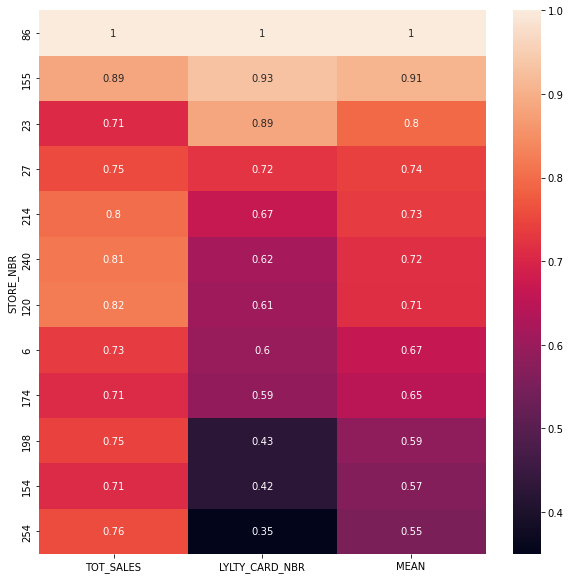

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(t4[t4.TOT_SALES.abs()>0.7],annot = True)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


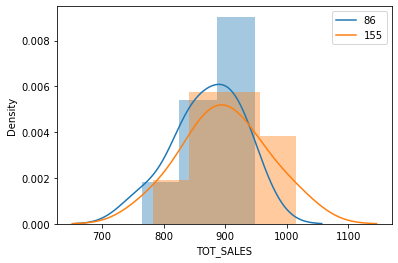

In [108]:
sns.distplot(dfprior.loc[86]['TOT_SALES'])
sns.distplot(dfprior.loc[155]['TOT_SALES'])
plt.legend(labels=['86','155'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


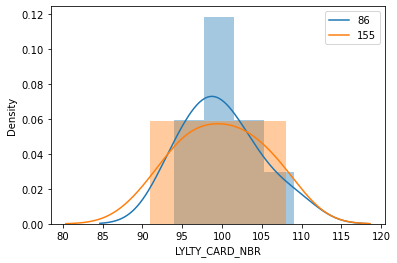

In [109]:
sns.distplot(dfprior.loc[86]['LYLTY_CARD_NBR'])
sns.distplot(dfprior.loc[155]['LYLTY_CARD_NBR'])
plt.legend(labels=['86','155'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


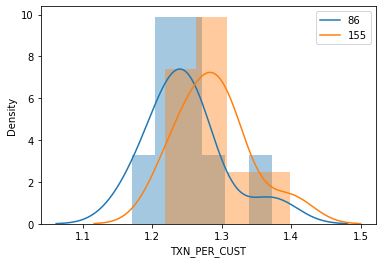

In [110]:
sns.distplot(dfprior.loc[86]['TXN_PER_CUST'])
sns.distplot(dfprior.loc[155]['TXN_PER_CUST'])
plt.legend(labels=['86','155'])

Now we observe the behavior during the trial period of these two stores:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


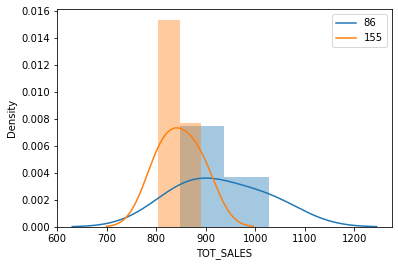

In [112]:
sns.distplot(dftrial.loc[86]['TOT_SALES'])
sns.distplot(dftrial.loc[155]['TOT_SALES'])
plt.legend(labels=['86','155'])

Mostly sales in the trial store are higher  as compared to control store

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


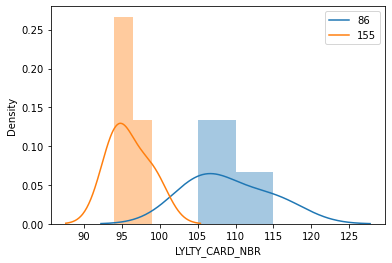

In [113]:
sns.distplot(dftrial.loc[86]['LYLTY_CARD_NBR'])
sns.distplot(dftrial.loc[155]['LYLTY_CARD_NBR'])
plt.legend(labels=['86','155'])

Customers visit in in greater numbers to the trial store

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


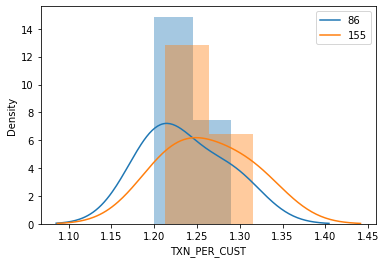

In [114]:
sns.distplot(dftrial.loc[86]['TXN_PER_CUST'])
sns.distplot(dftrial.loc[155]['TXN_PER_CUST'])
plt.legend(labels=['86','155'])

Not much difference is noted in t transaction per customers

In [24]:
t5 = Correlation(88)
t5.head()

,TOT_SALES,LYLTY_CARD_NBR,MEAN
STORE_NBR,,,
1,0.657299,0.343999,0.500649
2,0.202082,0.127006,0.164544
3,0.371783,0.533943,0.452863
4,0.407844,0.351343,0.379593
5,0.310585,0.280154,0.295370


In [26]:
t6=t5.sort_values(['MEAN'],ascending=False).dropna()
t6.head(15)

,TOT_SALES,LYLTY_CARD_NBR,MEAN
STORE_NBR,,,
88,1.000000,1.000000,1.000000
113,0.489780,0.797347,0.643564
187,0.619833,0.604224,0.612029
239,0.608617,0.613465,0.611041
134,0.870708,0.338051,0.604379
133,0.669638,0.524265,0.596951
237,0.236508,0.953220,0.594864
161,0.653020,0.534989,0.594004
14,0.632443,0.533647,0.583045


<AxesSubplot:ylabel='STORE_NBR'>

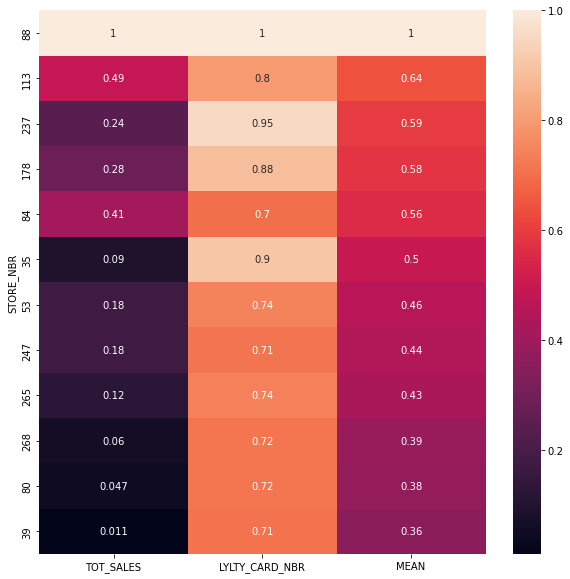

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(t6[t6.LYLTY_CARD_NBR.abs()>0.70],annot = True)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


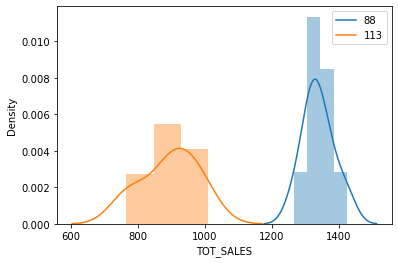

In [129]:
sns.distplot(dfprior.loc[88]['TOT_SALES'])
sns.distplot(dfprior.loc[113]['TOT_SALES'])
plt.legend(labels=['88','113'])

since 113 doesn't show similar graph as 88 we check with other stores until we find one that does

Stores 187,239,134,133 don't work either

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


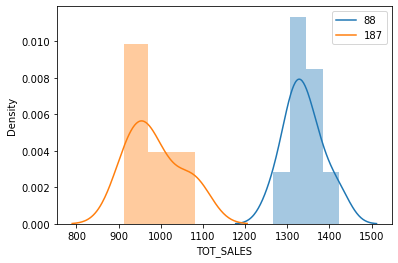

In [132]:
sns.distplot(dfprior.loc[88]['TOT_SALES'])
sns.distplot(dfprior.loc[133]['TOT_SALES'])
plt.legend(labels=['88','187'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


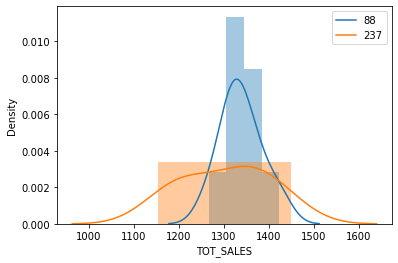

In [131]:
sns.distplot(dfprior.loc[88]['TOT_SALES'])
sns.distplot(dfprior.loc[237]['TOT_SALES'])
plt.legend(labels=['88','237'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


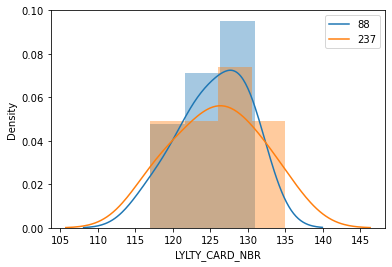

In [133]:
sns.distplot(dfprior.loc[88]['LYLTY_CARD_NBR'])
sns.distplot(dfprior.loc[237]['LYLTY_CARD_NBR'])
plt.legend(labels=['88','237'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


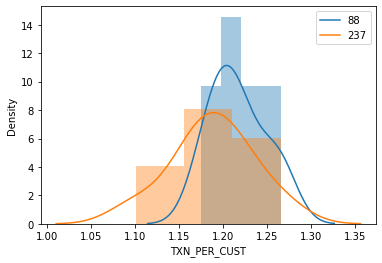

In [134]:
sns.distplot(dfprior.loc[88]['TXN_PER_CUST'])
sns.distplot(dfprior.loc[237]['TXN_PER_CUST'])
plt.legend(labels=['88','237'])

Hence we can take 237 as our control store

For trial period now:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


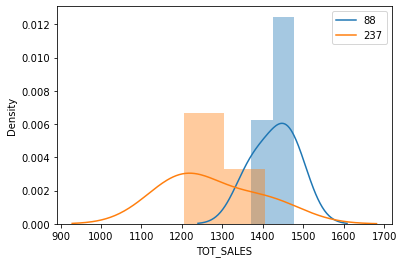

In [20]:
sns.distplot(dftrial.loc[88]['TOT_SALES'])
sns.distplot(dftrial.loc[237]['TOT_SALES'])
plt.legend(labels=['88','237'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


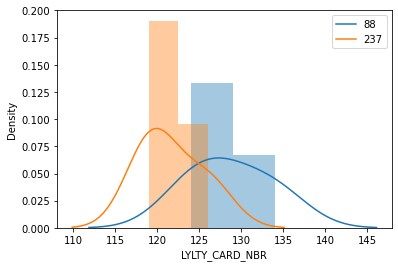

In [13]:
sns.distplot(dftrial.loc[88]['LYLTY_CARD_NBR'])
sns.distplot(dftrial.loc[237]['LYLTY_CARD_NBR'])
plt.legend(labels=['88','237'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


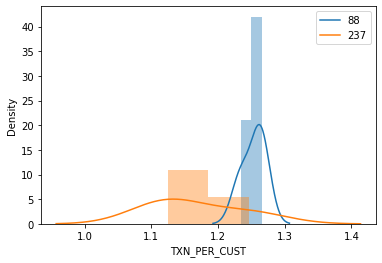

In [27]:
sns.distplot(dftrial.loc[88]['TXN_PER_CUST'])
sns.distplot(dftrial.loc[237]['TXN_PER_CUST'])
plt.legend(labels=['88','237'])

In all cases even avg transactions per customers the trial store fares significantly better than the control store

(201807.0, 201812.0)

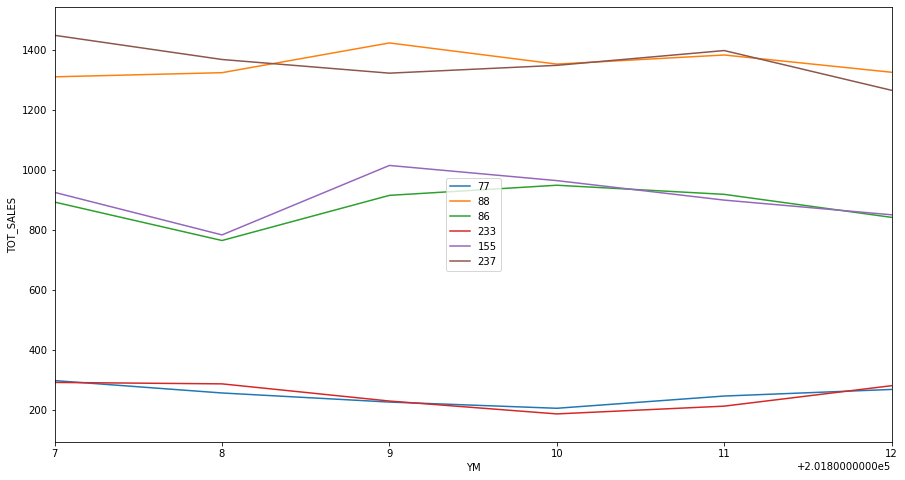

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))
x=[77,88,86,233,155,237]
for i in  x:
    sns.lineplot(data=df2.loc[i],y='TOT_SALES',x=df2.index.get_level_values(1).unique(),label=i)
ax.set_xlim(201807,201812)

(201901.0, 201906.0)

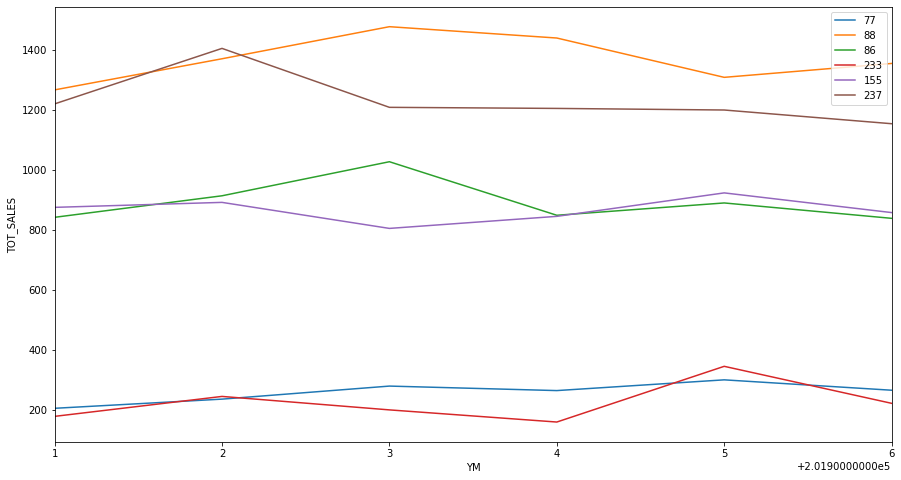

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))
x=[77,88,86,233,155,237]
for i in  x:
    sns.lineplot(data=df2.loc[i],y='TOT_SALES',x=df2.index.get_level_values(1).unique(),label=i)
ax.set_xlim(201901,201906)

### CONCLUSION:

In all trial stores there a noticeble to significant increase seen in total sales and total no of customers recieved however transactions per customer remain largely the same except in the case of trial store 88 perhaps trial implemented there was somehow different. Overall the trial has been a success (to varying degrees as is clear from the graphs)

In [1]:
t2.head()

NameError: name 't2' is not defined